# Communication System

## Libraries and Constants

In [132]:
from numpy import *
import matplotlib.pyplot as plt
import my_functions as fn

from scipy.special import erfc  # complementary error function

## Constants
# Sampling
T = 1 / 1000  # s
fs = 1 / T  # Hz
# Time vector
tmax = 0.5
t = arange(0, tmax, T)
# Characteristic size
M = len(t)

## Source of Information
- Generates the *message signal* from an analog source
- Samples the analog message with a samplig frequency fs where $fs > 2 f_{max}$ of the signal
- Considers the message signal as an random process

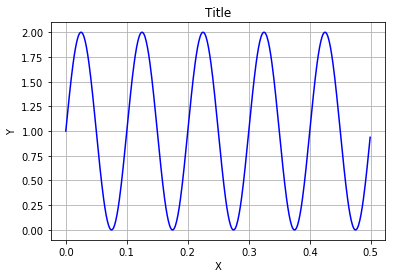

In [133]:
## Deterministic message signal
f0 = 10
omega = 2 * pi * f0  # fs > 2f
A = 1
m = 1
u = A * sin(omega * t + 0) + m

fn.plotit(t, u, "Title", "X", "Y")

## Source Encoder

- Generates the *source code word*

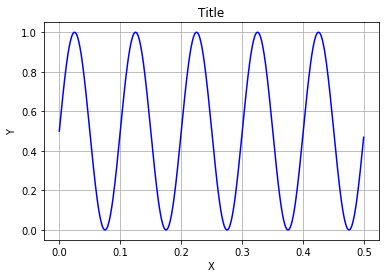

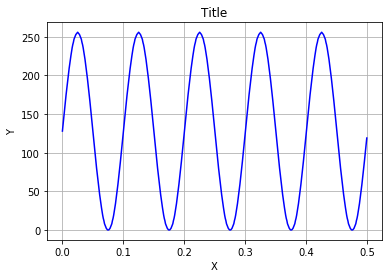

In [134]:
## Encode the sampled analog signal into a bit pattern.
# Example: we divide the amplitude in a scale of 8 bits and each sequence of 8 bits represents a point
# in the end we should have t/T * 8 bits
# 2^8 bits codification - the first is a signal bit
n = 8  # number of bits codification
x = (u - mean(u) - min(u - mean(u))) / max(u - mean(u) - min(u - mean(u)))
fn.plotit(t, x)
x = 2**n * (
    u - mean(u) - min(u - mean(u))) / max(u - mean(u) - min(u - mean(u)))
x = x.astype(int)
fn.plotit(t, x)
b = ''  # strings of all bits togheter
for i in range(M):
    str = "{0:b}".format(x[i])  # variable length source code word
    str = str.zfill(n)  # 8 length source code word
    b = b + str  # transform b in an array of symbols 0's and 1's

## Channel Encoder (modulator)

- Generates the waveform
- "A major objective in designing the modulator and demodulator is to maximize the
rate at which bits enter the encoder, subject to the need to retrieve the original bit stream with
a suitably small error rate. Usually this must be done subject to constraints on the transmitted
power and bandwidth. In practice there are also constraints on delay, complexity, compatibility
with standards, etc."

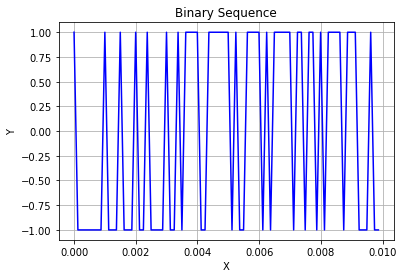

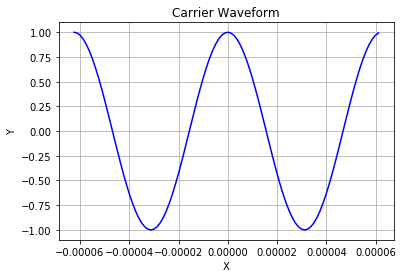

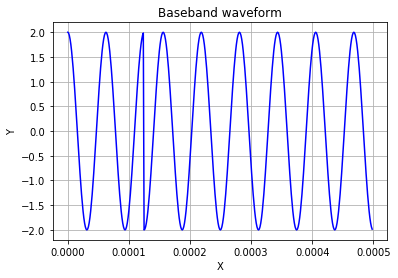

(-17020.0, 17020.0)

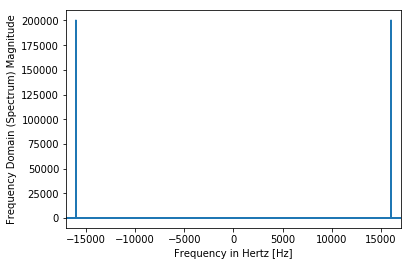

In [140]:
## Input
b

### There are several modulations available
Tb = T / n  # spaced instants of time that binary symbols enters the encoder

## 1. Binary Phase Shift Keying: the carrying wave amplitude and frequency is constant, however the phase changes
# 2 - PSK: 2 different phase representations. Maps binary symbols unsing the map 0 -> +1 and 1-> -1. Constellation of size 2
um = empty(len(b))  # u - modulated (symbols modulated)
for i in range(len(b)): # step function
    if (b[i] == '0'):
        um[i] = -1
    else:
        um[i] = 1


## 2. PAM Modulation
#### implement

# Characterization of transmission
N = len(um)  # size of the packet
r = floor( N / tmax)  # bit rate (bits/s) (transmission of information with time length constant)
ft = r  # transmission frequency (hypothesis: equals to bitrate)
Ts = N / r  # transmission time duration (period) for a message
Tb = Ts / N  # bit duration
Bb = 1 / (2*Tb) # Passband

## Generation of modulation wave form
tt = arange(0, Ts, Tb)  # transmission time space (binary symbols)
um = um[:len(tt)]
fn.plotit(tt[0:80], um[0:80], "Binary Sequence")

### Baseband to passband
## Fourrier transform
Ac = 1  # Amplitude of the carrier wave
fc = 2 / Tb  # Hz # carrier frequency is a multiple of 1/Tb
interval = Tb / 100 # Sampling interval - the smallest the interval the bigger the power peak
fs = 1/interval # sampling frequency
tw = arange(-Tb/2, Tb/2, interval) # time-space of the truncated waveform
cw = Ac * cos(2 * pi * fc * tw)
fn.plotit(tw, cw, "Carrier Waveform")
# Waveform formatting
s = ones([len(um), len(cw)])
s = (s.T * um).T
s = 2 * s * cw # result of the transformation
s = s.flatten() # Resulting message (t)
tc = arange(0, Ts, interval)  # New time vector

fn.plotit(tc[0:int(len(tt)/10)], s[0:int(len(tt)/10)], "Baseband waveform")


freq = fft.fftfreq(len(tc), d = interval) # Frequency space
shat = fft.fft(Ac * cos(2 * pi * fc * tc))
fig, ax = plt.subplots()

ax.plot(freq, shat.real)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-fc-1000, fc+1000)

#Expected signal power:


## Channel

- Generates the *received signal*

### Information Capacity Theorem

$C = B log_2(1+SNR)$  b/s

- C is the information capacity of the channel

- B is the channel *bandwidth*

- SNR is the received *signal to noise ratio*

### Efficiency

Close to 1 is better.

$\eta = R/C$

- R is the *siganling rate*

In [155]:
Wb = Bb  # Noise Baseband frequency limit

### Noise - varying power
SNRdbmin = 0
SNRdbmax = 10
Eb_No_dB = arange(SNRdbmin,
                  SNRdbmax + 1)  # signal to noise ration (SNR) in (dB)
SNR = 10**(Eb_No_dB / 10.0)  # signal to noise ratio (linear)
Eb = Tb  # energy per bit (J) - chosen as Tb to normalise Psignal
Psignal = Eb / Tb  # constant and equals to 1 (linear)

P = Psignal  # maximum channel power
var = No / 2  # Variance of the normal noise N(0,var) with power spectrum density No/2 = sig2*Tb
C = 0.5 * log10(1 + P / var)  # channel capacity
## 1. AWGN: Additive White Gaussian Noise (zero-mean WSS Gaussian Random Process)
# base noise - Sinc expansion
sig2 = 1
No = 2*sig2*Tb
mu = 0
z = random.normal(mu,sig2,len(shat))
Z = z*sinc((tc-freq*Tb)/Tb)

f = 10 
f_s = 100
t = arange(0,1,1/(f_s))

x = sinc(f * 2 * np.pi * t[-1/(f_s)/2:-1/(f_s)/2])*2*f

X = fft.fft(x)
freqs = fft.fftfreq(len(x),d = 1/f_s)


fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f-10, f+10)



Zhat = fft.fft(Z)
print(Ztest)

var = No*Wb # Variance of Z
#Sz = sig2*Tb*rect(freq*Tb) # Spectral density of the noise # constant spectral density over the baseband bandwidth Wb
## Output
#xt = s + z  # Signal + noise
print(freq)

TypeError: slice indices must be integers or None or have an __index__ method

## Demodulator

- Generates the *estimate of channel code word* 

## Channel Decoder

- Generates the *estimate of source code word*

## Source Decoder

- Generatyes the *estimate of message signal*

## Processing the received information